## Merging schedule.csv, merged_master_app.csv, and tbl_schedule.csv

Merging all four files together. Please note that master_app already took care of master and application files.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('precision', 5)

In [3]:
path = '/data/Dropbox/Data/Asylum_Courts/raw'

## Reading in master_app

In [3]:
master_app = pd.read_csv('../merged_any_master_app.csv')

In [4]:
master_app.head(5)

,idncase,idnproceeding,idnProceedingAppln,numAppsPerProc,dec,nat,case_type,c_asy_type,base_city_code,hearing_loc_code,osc_date,comp_date,attorney_flag,tracid,numProcPerCase
0,2046931.0,3200059.0,803710,4.0,DENY,CH,RMV,def,CHI,CHD,2003-09-09,2004-02-20,1.0,32.0,1
1,2046932.0,3371117.0,2819106,3.0,DENY,CH,RMV,def,NYC,NYC,2003-09-09,2005-05-13,1.0,148.0,1
2,2046933.0,3200063.0,3390354,3.0,DENY,CH,RMV,def,CLE,CEL,2003-09-16,2007-08-15,1.0,3.0,1
3,2046934.0,3200066.0,1643808,2.0,GRANT,CM,RMV,def,CHI,CHD,2003-09-24,2004-01-06,1.0,31.0,1
4,2046935.0,3200067.0,1681269,2.0,DENY,CH,AOC,def,CHI,CHD,2003-09-08,2004-01-30,1.0,32.0,1


In [5]:
master_app.count()

idncase               549237
idnproceeding         549237
idnProceedingAppln    549237
numAppsPerProc        549237
dec                   549237
nat                   549237
case_type             549237
c_asy_type            549237
base_city_code        549237
hearing_loc_code      549237
osc_date              549237
comp_date             549237
attorney_flag         549237
tracid                549237
numProcPerCase        549237
dtype: int64

In [6]:
# renaming variables 
#master_app = master_app.rename(columns={"idncase_x":"idncase", "Appl_Recd_Date":"appl_recd_date", "Appl_Dec":"appl_dec"})

In [7]:
master_app = master_app.drop('idnProceedingAppln', axis=1)

In [8]:
master_app = master_app.drop('base_city_code', axis=1)
master_app.head(5)

,idncase,idnproceeding,numAppsPerProc,dec,nat,case_type,c_asy_type,hearing_loc_code,osc_date,comp_date,attorney_flag,tracid,numProcPerCase
0,2046931.0,3200059.0,4.0,DENY,CH,RMV,def,CHD,2003-09-09,2004-02-20,1.0,32.0,1
1,2046932.0,3371117.0,3.0,DENY,CH,RMV,def,NYC,2003-09-09,2005-05-13,1.0,148.0,1
2,2046933.0,3200063.0,3.0,DENY,CH,RMV,def,CEL,2003-09-16,2007-08-15,1.0,3.0,1
3,2046934.0,3200066.0,2.0,GRANT,CM,RMV,def,CHD,2003-09-24,2004-01-06,1.0,31.0,1
4,2046935.0,3200067.0,2.0,DENY,CH,AOC,def,CHD,2003-09-08,2004-01-30,1.0,32.0,1


## Finalizing  schedule.csv

In [9]:
sched = pd.read_csv(path + '/schedule.csv', low_memory=False)

In [10]:
sched.head(5)

,idnschedule,idncase,idnproceeding,adj_medium,schedule_type,adj_date
0,1824128,2990069.0,1324191,NaN,--,05APR2000
1,1824130,2989583.0,1324273,NaN,--,07DEC1998
2,1824131,2989777.0,1324323,P,--,22FEB1999
3,1824132,2989998.0,1324391,NaN,--,05SEP1997
4,1824132,2990058.0,1324405,NaN,--,22DEC1999


In [11]:
sched.count()

idnschedule      15377519
idncase          15377502
idnproceeding    15377519
adj_medium        8825704
schedule_type    15377519
adj_date         15377519
dtype: int64

In [12]:
sched['adj_date'] = sched['adj_date'].astype('str')
# delete dates invalid formats
sched = sched[sched['adj_date'].apply(lambda x: len(x) == 9)] 
sched['adj_date'] = pd.to_datetime(sched['adj_date'], format='%d%b%Y')

In [13]:
schedtype_map = pd.read_csv(path + '/tbllookupSchedule_Type.csv', header=None)

In [14]:
schedtype_map.head(5)

,0,1,2,3,4,5,6,7,8,9
0,1,**,Non-Work,2002-11-21 12:46:14.360000000,EOIRHDQ\eckertk,NaN,NaN,N,True,True
1,29,--,UNKNOWN,2007-10-18 08:26:28.770000000,admin,2007-10-18 08:26:28.770000000,admin,-,False,True
2,23,AA,Administrative,NaN,NaN,NaN,NaN,N,True,True
3,21,AD,Admin Leave,2002-11-21 12:46:14.360000000,EOIRHDQ\eckertk,NaN,NaN,S,True,True
4,25,AN,Annual Leave,NaN,NaN,NaN,NaN,S,True,True


In [15]:
schedtype_map = schedtype_map.rename(columns={1:'schedule_type', 2:'sched_type'})
schedtype_map = schedtype_map[['schedule_type', 'sched_type']]

In [16]:
sched['schedule_type'] = sched['schedule_type'].astype('str').str.strip()
schedtype_map['schedule_type'] = schedtype_map['schedule_type'].astype('str').str.strip()

In [17]:
sched = pd.merge(sched, schedtype_map, on=['schedule_type'], how='left')

In [18]:
sched = sched.drop(columns=['schedule_type', 'idnschedule'])

In [19]:
sched['adj_medium'] = sched['adj_medium'].fillna('UNKNOWN')

In [20]:
sched.head(5)

,idncase,idnproceeding,adj_medium,adj_date,sched_type
0,2990069.0,1324191,UNKNOWN,2000-04-05,UNKNOWN
1,2989583.0,1324273,UNKNOWN,1998-12-07,UNKNOWN
2,2989777.0,1324323,P,1999-02-22,UNKNOWN
3,2989998.0,1324391,UNKNOWN,1997-09-05,UNKNOWN
4,2990058.0,1324405,UNKNOWN,1999-12-22,UNKNOWN


## Finalizing detailed_schedule.csv

In [21]:
tbl_sched = pd.read_csv('../detailed_schedule.csv', low_memory=False)

In [22]:
tbl_sched.head(5)

,idnschedule,idnproceeding,idncase,osc_date,lang,hearing_loc_code,alien_atty_code,adj_date,adj_rsn,lang_hearing,sched_type,notice_desc,adj_time_start2,adj_time_stop2,durationHearing,adj_rsn_desc
0,17035561,961394.0,2706979,1995-06-30 00:00:00,CV,BOS,GLI,1996-11-27 00:00:00,01,CAPE VERDIAN,UNKNOWN,NO ADDRESS MTN TO REOPEN ORDER OF THE IJ - SNA,1996-11-27 13:00:00,1996-11-27 14:30:00,90.0,ALIEN TO SEEK REPRESENTATION
1,17035562,961398.0,2706991,1991-01-18 00:00:00,ENG,BOS,,1991-05-21 00:00:00,14,ENGLISH,UNKNOWN,NO ADDRESS MTN TO REOPEN ORDER OF THE IJ - SNA,1991-05-21 08:30:00,1991-05-21 09:00:00,30.0,OTHER OPERATIONAL/SECURITY FACTORS
2,17035563,961402.0,2707014,1995-05-17 00:00:00,ENG,BOS,GAL,1997-04-02 00:00:00,NaN,ENGLISH,UNKNOWN,NO ADDRESS MTN TO REOPEN ORDER OF THE IJ - SNA,1997-04-02 13:00:00,1997-04-02 16:30:00,210.0,UNKNOWN
3,17035564,961405.0,2707014,1995-05-17 00:00:00,UNK,BOS,GAL,1996-04-16 00:00:00,NaN,UNKNOWN LANGUAGE,UNKNOWN,NO ADDRESS MTN TO REOPEN ORDER OF THE IJ - SNA,1996-04-16 09:00:00,1996-04-16 10:30:00,90.0,UNKNOWN
4,17035565,961406.0,2707020,1996-03-12 00:00:00,ENG,BOS,SAN,2003-01-08 00:00:00,04,ENGLISH,UNKNOWN,NO ADDRESS MTN TO REOPEN ORDER OF THE IJ - SNA,2003-01-08 13:00:00,2003-01-08 16:00:00,180.0,DHS OR DHS ADMIN FILE UNAVAILABLE FOR HEARING


In [23]:
tbl_sched['adj_date'] = pd.to_datetime(tbl_sched['adj_date'])

In [24]:
tbl_sched.count()

idnschedule         6725795
idnproceeding       6725795
idncase             6725795
osc_date            6725303
lang                6391027
hearing_loc_code    6725795
alien_atty_code     3533734
adj_date            6725795
adj_rsn             6020723
lang_hearing        6725795
sched_type          6725795
notice_desc         6725795
adj_time_start2     6725795
adj_time_stop2      6725795
durationHearing     6725795
adj_rsn_desc        6725795
dtype: int64

In [25]:
tbl_sched = tbl_sched.drop(columns=['idnschedule', 'hearing_loc_code', 'adj_rsn', 'sched_type', 'alien_atty_code', 'osc_date'])

## Merge all files!

In [26]:
# merging master_app.csv with schedule.csv
merged_sched_master = pd.merge(master_app, sched, on=['idncase', 'idnproceeding'])
merged_sched_master.count()

idncase             2274754
idnproceeding       2274754
numAppsPerProc      2274754
dec                 2274754
nat                 2274754
case_type           2274754
c_asy_type          2274754
hearing_loc_code    2274754
osc_date            2274754
comp_date           2274754
attorney_flag       2274754
tracid              2274754
numProcPerCase      2274754
adj_medium          2274754
adj_date            2274754
sched_type          2274754
dtype: int64

In [27]:
# doing a left join-- this shows ~1000 applications didn't have hearings 
#test = pd.merge(master_app, sched, on=['idncase', 'idnproceeding'], how='left')
#test.count()

In [28]:
# checking merged dataframe
merged_sched_master.head(5)

,idncase,idnproceeding,numAppsPerProc,dec,nat,case_type,c_asy_type,hearing_loc_code,osc_date,comp_date,attorney_flag,tracid,numProcPerCase,adj_medium,adj_date,sched_type
0,2046931.0,3.2001e+06,4.0,DENY,CH,RMV,def,CHD,2003-09-09,2004-02-20,1.0,32.0,1,V,2003-11-03,UNKNOWN
1,2046931.0,3.2001e+06,4.0,DENY,CH,RMV,def,CHD,2003-09-09,2004-02-20,1.0,32.0,1,P,2004-02-20,UNKNOWN
2,2046931.0,3.2001e+06,4.0,DENY,CH,RMV,def,CHD,2003-09-09,2004-02-20,1.0,32.0,1,P,2003-11-17,UNKNOWN
3,2046931.0,3.2001e+06,4.0,DENY,CH,RMV,def,CHD,2003-09-09,2004-02-20,1.0,32.0,1,V,2003-12-01,UNKNOWN
4,2046931.0,3.2001e+06,4.0,DENY,CH,RMV,def,CHD,2003-09-09,2004-02-20,1.0,32.0,1,V,2003-12-22,UNKNOWN


In [29]:
# merging with tbl_schedule.csv
merged_sched_master = pd.merge(merged_sched_master, tbl_sched, on=['idncase', 'idnproceeding', 'adj_date'], how='left')
merged_sched_master.count()

idncase             2350909
idnproceeding       2350909
numAppsPerProc      2350909
dec                 2350909
nat                 2350909
case_type           2350909
c_asy_type          2350909
hearing_loc_code    2350909
osc_date            2350909
comp_date           2350909
attorney_flag       2350909
tracid              2350909
numProcPerCase      2350909
adj_medium          2350909
adj_date            2350909
sched_type          2350909
lang                 896653
lang_hearing        1014416
notice_desc         1014416
adj_time_start2     1014416
adj_time_stop2      1014416
durationHearing     1014416
adj_rsn_desc        1014416
dtype: int64

## Generating number of "hearings per proceeding" feature

In [30]:
merged_sched_master['numHearingsPerProc'] = 1
# adding additional feature based on how many hearings have been scheduled for the same (idnCase, idnProceeding) pair
merged_sched_master['numHearingsPerProc'] = merged_sched_master.groupby(['idncase', 'idnproceeding'])['numHearingsPerProc'].transform('count')

In [31]:
merged_sched_master.head(5)

,idncase,idnproceeding,numAppsPerProc,dec,nat,case_type,c_asy_type,hearing_loc_code,osc_date,comp_date,...,adj_date,sched_type,lang,lang_hearing,notice_desc,adj_time_start2,adj_time_stop2,durationHearing,adj_rsn_desc,numHearingsPerProc
0,2.0469e+06,3.2001e+06,4.0,DENY,CH,RMV,def,CHD,2003-09-09,2004-02-20,...,2003-11-03,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
1,2.0469e+06,3.2001e+06,4.0,DENY,CH,RMV,def,CHD,2003-09-09,2004-02-20,...,2004-02-20,UNKNOWN,MAN,MANDARIN,NO ADDRESS MTN TO REOPEN ORDER OF THE IJ - SNA,2004-02-20 09:00:00,2004-02-20 12:00:00,180.0,UNKNOWN,6
2,2.0469e+06,3.2001e+06,4.0,DENY,CH,RMV,def,CHD,2003-09-09,2004-02-20,...,2003-11-17,UNKNOWN,NaN,UNKNOWN LANGUAGE,NO ADDRESS MTN TO REOPEN ORDER OF THE IJ - SNA,2003-11-17 10:00:00,2003-11-17 11:00:00,60.0,ALIEN TO SEEK REPRESENTATION,6
3,2.0469e+06,3.2001e+06,4.0,DENY,CH,RMV,def,CHD,2003-09-09,2004-02-20,...,2003-12-01,UNKNOWN,NaN,UNKNOWN LANGUAGE,NO ADDRESS MTN TO REOPEN ORDER OF THE IJ - SNA,2003-12-01 10:00:00,2003-12-01 11:00:00,60.0,INSUFFICIENT TIME TO COMPLETE HEARING,6
4,2.0469e+06,3.2001e+06,4.0,DENY,CH,RMV,def,CHD,2003-09-09,2004-02-20,...,2003-12-22,UNKNOWN,NaN,UNKNOWN LANGUAGE,NO ADDRESS MTN TO REOPEN ORDER OF THE IJ - SNA,2003-12-22 10:00:00,2003-12-22 11:00:00,60.0,ALIEN TO SEEK REPRESENTATION,6


## Generationg "number of days between first and last hearing" feature

In [32]:
merged_sched_master = merged_sched_master.sort_values(['idnproceeding','adj_date']).reset_index()

In [33]:
merged_sched_master["durationFirstLastHearing"]= merged_sched_master.groupby(['idncase', 'idnproceeding'])['adj_date'].transform(lambda x: x.iloc[-1] - x.iloc[0]).dt.days

In [34]:
# this shows that many proceedings spanned an unreasonable amount of time (in days)
merged_sched_master.sort_values(['durationFirstLastHearing', 'idnproceeding', 'adj_date'], ascending=False).head(20)

,index,idncase,idnproceeding,numAppsPerProc,dec,nat,case_type,c_asy_type,hearing_loc_code,osc_date,...,sched_type,lang,lang_hearing,notice_desc,adj_time_start2,adj_time_stop2,durationHearing,adj_rsn_desc,numHearingsPerProc,durationFirstLastHearing
2017296,2062023,5.9971e+06,4.5426e+06,1.0,DENY,ES,DEP,def,PHO,1984-05-23,...,Initial Master,SP,SPANISH,UNKNOWN,2008-08-19 08:30:00,2008-08-19 12:30:00,240.0,OTHER OPERATIONAL/SECURITY FACTORS,6,8764
2017295,2062028,5.9971e+06,4.5426e+06,1.0,DENY,ES,DEP,def,PHO,1984-05-23,...,Individual,SP,SPANISH,NO ADDRESS MTN TO REOPEN ORDER OF THE IJ - SNA,1985-07-09 13:00:00,1985-07-09 14:00:00,60.0,IJ Completion prior to hearing,6,8764
2017294,2062027,5.9971e+06,4.5426e+06,1.0,DENY,ES,DEP,def,PHO,1984-05-23,...,Master Reset,SP,SPANISH,NO ADDRESS MTN TO REOPEN ORDER OF THE IJ - SNA,1985-03-04 13:00:00,1985-03-04 13:30:00,30.0,MC TO IC--MERITS HEARING,6,8764
2017293,2062026,5.9971e+06,4.5426e+06,1.0,DENY,ES,DEP,def,PHO,1984-05-23,...,Individual,SP,SPANISH,NO ADDRESS MTN TO REOPEN ORDER OF THE IJ - SNA,1984-10-16 16:00:00,1984-10-16 16:30:00,30.0,MC TO IC--MERITS HEARING,6,8764
2017292,2062025,5.9971e+06,4.5426e+06,1.0,DENY,ES,DEP,def,PHO,1984-05-23,...,Master Reset,SP,SPANISH,NO ADDRESS MTN TO REOPEN ORDER OF THE IJ - SNA,1984-09-11 13:00:00,1984-09-11 13:30:00,30.0,ALIEN TO SEEK REPRESENTATION,6,8764
2017291,2062024,5.9971e+06,4.5426e+06,1.0,DENY,ES,DEP,def,PHO,1984-05-23,...,Initial Master,SP,SPANISH,NO ADDRESS MTN TO REOPEN ORDER OF THE IJ - SNA,1984-08-21 09:00:00,1984-08-21 09:30:00,30.0,ALIEN TO SEEK REPRESENTATION,6,8764
1756068,1830850,5.5654e+06,3.9964e+06,3.0,DENY,ES,RMV,aff,WAS,2006-07-28,...,Individual Asylum,SP,SPANISH,NOTICE OF HEARING IN REMOVAL PROCEEDING- W/ DATES,2010-11-04 14:00:00,2010-11-04 17:00:00,180.0,IJ Completion prior to hearing,25,8445
1756067,1830852,5.5654e+06,3.9964e+06,3.0,DENY,ES,RMV,aff,WAS,2006-07-28,...,Individual Asylum,SP,SPANISH,NOTICE OF HEARING IN REMOVAL PROCEEDING- W/ DATES,2009-10-23 10:30:00,2009-10-23 12:00:00,90.0,DHS OR DHS ADMIN FILE UNAVAILABLE FOR HEARING,25,8445
1756066,1830851,5.5654e+06,3.9964e+06,3.0,DENY,ES,RMV,aff,WAS,2006-07-28,...,Master Reset,SP,SPANISH,NOTICE OF HEARING IN REMOVAL PROCEEDING- W/ DATES,2008-11-12 10:00:00,2008-11-12 10:30:00,30.0,DHS INVESTIGATION,25,8445
1756065,1830857,5.5654e+06,3.9964e+06,3.0,DENY,ES,RMV,aff,WAS,2006-07-28,...,Master Reset,SP,SPANISH,NOTICE OF HEARING IN REMOVAL PROCEEDING- W/ DATES,2008-09-24 10:00:00,2008-09-24 10:30:00,30.0,ALIEN OR REP. REJECTED EARLIEST POSSIBLE HEARING,25,8445


## Generating "average hearing duration" feature

In [35]:
merged_sched_master['averageHearingDur']= merged_sched_master.groupby(['idncase', 'idnproceeding'])['durationHearing'].transform('mean')

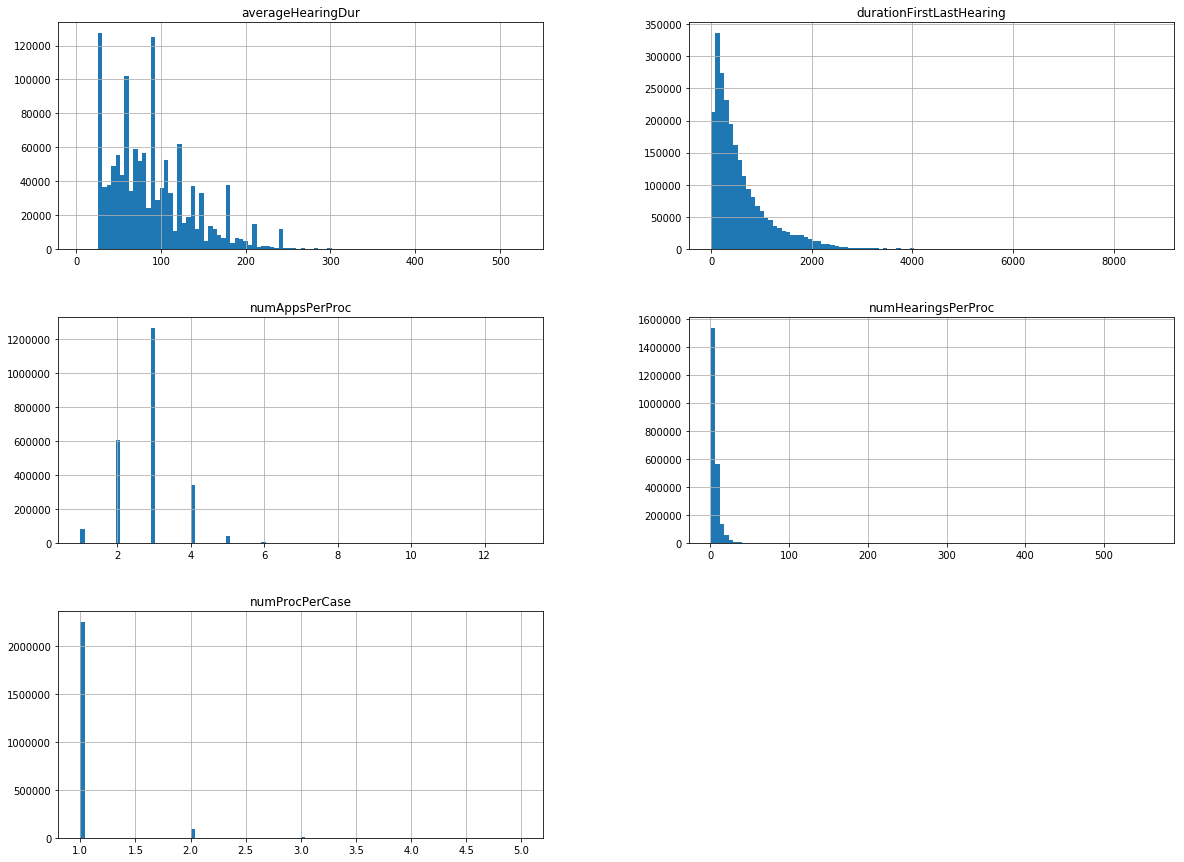

In [36]:
merged_sched_master.hist(bins=100, column=['numAppsPerProc', 'numHearingsPerProc', 'numProcPerCase', 'durationFirstLastHearing', 'averageHearingDur'], figsize=(20, 15))
plt.show()

## Generating "political affiliation" feature

In [37]:
pres = {1985:'REP', 1986:'REP', 1987:'REP', 1988:'REP', 1989:'REP', 1990:'REP', 1991:'REP', 1992:'REP', 1993:'DEM', 1994:'DEM', 1995:'DEM', 1996:'DEM', 1997:'DEM', 1998:'DEM', 1999:'DEM', 2000:'DEM', 2001:'REP', 2002:'REP', 2003:'REP', 2004:'REP', 2005:'REP', 2006:'REP', 2007:'REP', 2008:'REP', 2009:'DEM', 2010:'DEM', 2011:'DEM', 2012:'DEM', 2013:'DEM', 2014:'DEM'}

In [38]:
merged_sched_master['pres_aff'] = merged_sched_master['adj_date'].dt.year.map(pres)

## Selecting the last hearing for each idncase

In [41]:
merged_sched_master = merged_sched_master.groupby(['idncase', 'idnproceeding'], as_index=False).last()

In [44]:
merged_sched_master.head(5)

,idncase,idnproceeding,index,numAppsPerProc,dec,nat,case_type,c_asy_type,hearing_loc_code,osc_date,...,lang_hearing,notice_desc,adj_time_start2,adj_time_stop2,durationHearing,adj_rsn_desc,numHearingsPerProc,durationFirstLastHearing,averageHearingDur,pres_aff
0,2046931.0,3200059.0,1,4.0,DENY,CH,RMV,def,CHD,2003-09-09,...,MANDARIN,NO ADDRESS MTN TO REOPEN ORDER OF THE IJ - SNA,2004-02-20 09:00:00,2004-02-20 12:00:00,180.0,UNKNOWN,6,109,84.0,REP
1,2046932.0,3371117.0,7,3.0,DENY,CH,RMV,def,NYC,2003-09-09,...,FOO CHOW,NO ADDRESS MTN TO REOPEN ORDER OF THE IJ - SNA,2005-05-13 14:30:00,2005-05-13 16:00:00,90.0,UNKNOWN,2,134,90.0,REP
2,2046933.0,3200063.0,12,3.0,DENY,CH,RMV,def,CEL,2003-09-16,...,NaN,NaN,NaN,NaN,NaN,NaN,5,1065,NaN,REP
3,2046934.0,3200066.0,16,2.0,GRANT,CM,RMV,def,CHD,2003-09-24,...,ENGLISH,NO ADDRESS MTN TO REOPEN ORDER OF THE IJ - SNA,2004-01-06 10:30:00,2004-01-06 11:00:00,30.0,UNKNOWN,4,98,60.0,REP
4,2046935.0,3200067.0,18,2.0,DENY,CH,AOC,def,CHD,2003-09-08,...,MANDARIN,NO ADDRESS MTN TO REOPEN ORDER OF THE IJ - SNA,2004-01-30 13:00:00,2004-01-30 15:00:00,120.0,UNKNOWN,6,130,108.0,REP


In [42]:
merged_sched_master.count()

idncase                     548373
idnproceeding               548373
index                       548373
numAppsPerProc              548373
dec                         548373
nat                         548373
case_type                   548373
c_asy_type                  548373
hearing_loc_code            548373
osc_date                    548373
comp_date                   548373
attorney_flag               548373
tracid                      548373
numProcPerCase              548373
adj_medium                  548373
adj_date                    548373
sched_type                  548373
lang                        257918
lang_hearing                258735
notice_desc                 258735
adj_time_start2             258735
adj_time_stop2              258735
durationHearing             258735
adj_rsn_desc                258735
numHearingsPerProc          548373
durationFirstLastHearing    548373
averageHearingDur           258735
pres_aff                    548272
dtype: int64

In [45]:
merged_sched_master = merged_sched_master.fillna('UNKNOWN')

In [49]:
merged_sched_master.head(5)

,idncase,idnproceeding,index,numAppsPerProc,dec,nat,case_type,c_asy_type,hearing_loc_code,osc_date,...,lang_hearing,notice_desc,adj_time_start2,adj_time_stop2,durationHearing,adj_rsn_desc,numHearingsPerProc,durationFirstLastHearing,averageHearingDur,pres_aff
0,2046931.0,3200059.0,1,4.0,DENY,CH,RMV,def,CHD,2003-09-09,...,MANDARIN,NO ADDRESS MTN TO REOPEN ORDER OF THE IJ - SNA,2004-02-20 09:00:00,2004-02-20 12:00:00,180,UNKNOWN,6,109,84,REP
1,2046932.0,3371117.0,7,3.0,DENY,CH,RMV,def,NYC,2003-09-09,...,FOO CHOW,NO ADDRESS MTN TO REOPEN ORDER OF THE IJ - SNA,2005-05-13 14:30:00,2005-05-13 16:00:00,90,UNKNOWN,2,134,90,REP
2,2046933.0,3200063.0,12,3.0,DENY,CH,RMV,def,CEL,2003-09-16,...,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,5,1065,UNKNOWN,REP
3,2046934.0,3200066.0,16,2.0,GRANT,CM,RMV,def,CHD,2003-09-24,...,ENGLISH,NO ADDRESS MTN TO REOPEN ORDER OF THE IJ - SNA,2004-01-06 10:30:00,2004-01-06 11:00:00,30,UNKNOWN,4,98,60,REP
4,2046935.0,3200067.0,18,2.0,DENY,CH,AOC,def,CHD,2003-09-08,...,MANDARIN,NO ADDRESS MTN TO REOPEN ORDER OF THE IJ - SNA,2004-01-30 13:00:00,2004-01-30 15:00:00,120,UNKNOWN,6,130,108,REP


## Generating "case duration" feature

In [52]:
merged_sched_master['comp_date'] = pd.to_datetime(merged_sched_master['comp_date'])
merged_sched_master['osc_date'] = pd.to_datetime(merged_sched_master['osc_date'])

In [54]:
merged_sched_master.count()

idncase                     548373
idnproceeding               548373
index                       548373
numAppsPerProc              548373
dec                         548373
nat                         548373
case_type                   548373
c_asy_type                  548373
hearing_loc_code            548373
osc_date                    548373
comp_date                   548373
attorney_flag               548373
tracid                      548373
numProcPerCase              548373
adj_medium                  548373
adj_date                    548373
sched_type                  548373
lang                        548373
lang_hearing                548373
notice_desc                 548373
adj_time_start2             548373
adj_time_stop2              548373
durationHearing             548373
adj_rsn_desc                548373
numHearingsPerProc          548373
durationFirstLastHearing    548373
averageHearingDur           548373
pres_aff                    548373
dtype: int64

In [59]:
merged_sched_master['caseDuration'] = merged_sched_master.apply(lambda x: x['comp_date'] - x['osc_date'], axis=1).dt.days

In [60]:
merged_sched_master.head(5)

,idncase,idnproceeding,index,numAppsPerProc,dec,nat,case_type,c_asy_type,hearing_loc_code,osc_date,...,notice_desc,adj_time_start2,adj_time_stop2,durationHearing,adj_rsn_desc,numHearingsPerProc,durationFirstLastHearing,averageHearingDur,pres_aff,caseDuration
0,2046931.0,3200059.0,1,4.0,DENY,CH,RMV,def,CHD,2003-09-09,...,NO ADDRESS MTN TO REOPEN ORDER OF THE IJ - SNA,2004-02-20 09:00:00,2004-02-20 12:00:00,180,UNKNOWN,6,109,84,REP,164
1,2046932.0,3371117.0,7,3.0,DENY,CH,RMV,def,NYC,2003-09-09,...,NO ADDRESS MTN TO REOPEN ORDER OF THE IJ - SNA,2005-05-13 14:30:00,2005-05-13 16:00:00,90,UNKNOWN,2,134,90,REP,612
2,2046933.0,3200063.0,12,3.0,DENY,CH,RMV,def,CEL,2003-09-16,...,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,5,1065,UNKNOWN,REP,1429
3,2046934.0,3200066.0,16,2.0,GRANT,CM,RMV,def,CHD,2003-09-24,...,NO ADDRESS MTN TO REOPEN ORDER OF THE IJ - SNA,2004-01-06 10:30:00,2004-01-06 11:00:00,30,UNKNOWN,4,98,60,REP,104
4,2046935.0,3200067.0,18,2.0,DENY,CH,AOC,def,CHD,2003-09-08,...,NO ADDRESS MTN TO REOPEN ORDER OF THE IJ - SNA,2004-01-30 13:00:00,2004-01-30 15:00:00,120,UNKNOWN,6,130,108,REP,144


In [61]:
merged_sched_master['hearingDayOfWeek'] = merged_sched_master['adj_date'].dt.weekday_name

In [63]:
merged_sched_master['hearingYear'] = merged_sched_master['adj_date'].dt.year
merged_sched_master['hearingMonth'] = merged_sched_master['adj_date'].dt.month

In [65]:
merged_sched_master.head(10)

,idncase,idnproceeding,index,numAppsPerProc,dec,nat,case_type,c_asy_type,hearing_loc_code,osc_date,...,durationHearing,adj_rsn_desc,numHearingsPerProc,durationFirstLastHearing,averageHearingDur,pres_aff,caseDuration,hearingDayOfWeek,hearingYear,hearingMonth
0,2046931.0,3200059.0,1,4.0,DENY,CH,RMV,def,CHD,2003-09-09,...,180,UNKNOWN,6,109,84,REP,164,Friday,2004,2
1,2046932.0,3371117.0,7,3.0,DENY,CH,RMV,def,NYC,2003-09-09,...,90,UNKNOWN,2,134,90,REP,612,Friday,2005,5
2,2046933.0,3200063.0,12,3.0,DENY,CH,RMV,def,CEL,2003-09-16,...,UNKNOWN,UNKNOWN,5,1065,UNKNOWN,REP,1429,Wednesday,2007,8
3,2046934.0,3200066.0,16,2.0,GRANT,CM,RMV,def,CHD,2003-09-24,...,30,UNKNOWN,4,98,60,REP,104,Tuesday,2004,1
4,2046935.0,3200067.0,18,2.0,DENY,CH,AOC,def,CHD,2003-09-08,...,120,UNKNOWN,6,130,108,REP,144,Friday,2004,1
5,2046936.0,3200068.0,24,3.0,DENY,CH,RMV,def,NYC,2003-09-16,...,240,UNKNOWN,2,216,240,REP,392,Tuesday,2004,10
6,2046938.0,3200072.0,27,3.0,DENY,AL,RMV,def,CHD,2003-10-01,...,180,CASE CONVERSION,3,36,180,REP,50,Thursday,2003,11
7,2046939.0,3200073.0,30,3.0,DENY,AL,RMV,def,CHD,2003-10-01,...,180,UNKNOWN,3,36,180,REP,50,Thursday,2003,11
8,2046940.0,3609931.0,34,2.0,GRANT,CH,RMV,def,NEW,2003-10-01,...,UNKNOWN,UNKNOWN,4,553,UNKNOWN,REP,1219,Thursday,2007,2
9,2046941.0,3200077.0,36,3.0,DENY,CH,RMV,def,CHD,2003-10-01,...,180,UNKNOWN,6,153,84,REP,167,Tuesday,2004,3


In [66]:
merged_sched_master.to_csv('../merged_any_master_schedule_v2.csv', index=False)

In [17]:
merged_sched_master = pd.read_csv('../merged_any_master_schedule_v2.csv')

In [18]:
merged_sched_master.head(5)

,idncase,idnproceeding,index,numAppsPerProc,dec,nat,case_type,c_asy_type,hearing_loc_code,osc_date,...,durationHearing,adj_rsn_desc,numHearingsPerProc,durationFirstLastHearing,averageHearingDur,pres_aff,caseDuration,hearingDayOfWeek,hearingYear,hearingMonth
0,2046931.0,3200059.0,1,4.0,DENY,CH,RMV,def,CHD,2003-09-09,...,180.0,UNKNOWN,6,109,84.0,REP,164,Friday,2004,2
1,2046932.0,3371117.0,7,3.0,DENY,CH,RMV,def,NYC,2003-09-09,...,90.0,UNKNOWN,2,134,90.0,REP,612,Friday,2005,5
2,2046933.0,3200063.0,12,3.0,DENY,CH,RMV,def,CEL,2003-09-16,...,UNKNOWN,UNKNOWN,5,1065,UNKNOWN,REP,1429,Wednesday,2007,8
3,2046934.0,3200066.0,16,2.0,GRANT,CM,RMV,def,CHD,2003-09-24,...,30.0,UNKNOWN,4,98,60.0,REP,104,Tuesday,2004,1
4,2046935.0,3200067.0,18,2.0,DENY,CH,AOC,def,CHD,2003-09-08,...,120.0,UNKNOWN,6,130,108.0,REP,144,Friday,2004,1


In [19]:
merged_sched_master = merged_sched_master.drop(columns=['adj_date', 'adj_time_start2', 'adj_time_stop2'])
merged_sched_master.loc[(merged_sched_master["dec"] == 'DENY'),'dec'] = 0
merged_sched_master.loc[(merged_sched_master["dec"] == 'GRANT'),'dec'] = 1
merged_sched_master['comp_date'] = pd.to_datetime(merged_sched_master['comp_date'],infer_datetime_format = True)


In [20]:
merged_sched_master.sort_values(['comp_date']).head(3)

,idncase,idnproceeding,index,numAppsPerProc,dec,nat,case_type,c_asy_type,hearing_loc_code,osc_date,...,durationHearing,adj_rsn_desc,numHearingsPerProc,durationFirstLastHearing,averageHearingDur,pres_aff,caseDuration,hearingDayOfWeek,hearingYear,hearingMonth
5009,2151192.0,243519.0,22323,3.0,0,IR,DEP,def,NEW,1984-05-09,...,UNKNOWN,UNKNOWN,2,127,UNKNOWN,REP,238,Wednesday,1985,1
7041,2177593.0,275896.0,30314,3.0,0,ET,DEP,def,LOS,1984-10-29,...,UNKNOWN,UNKNOWN,1,0,UNKNOWN,UNKNOWN,66,Wednesday,1984,12
7018,2177203.0,276028.0,30182,3.0,0,ET,DEP,def,LOS,1984-10-29,...,UNKNOWN,UNKNOWN,1,0,UNKNOWN,UNKNOWN,66,Wednesday,1984,12


In [21]:
startdate = np.datetime64('1985-01-02')
merged_sched_master['comp_date_in_days'] = merged_sched_master['comp_date'].apply(lambda x: (x - startdate).days)

In [24]:
merged_sched_master = merged_sched_master.drop(columns=['comp_date'])

In [22]:
merged_sched_master = merged_sched_master.drop(columns=['index', 'osc_date', 'lang'])

In [25]:
merged_sched_master.to_csv('../merged_any_master_schedule_v3.csv', index=False)

## Histogram of numerical features

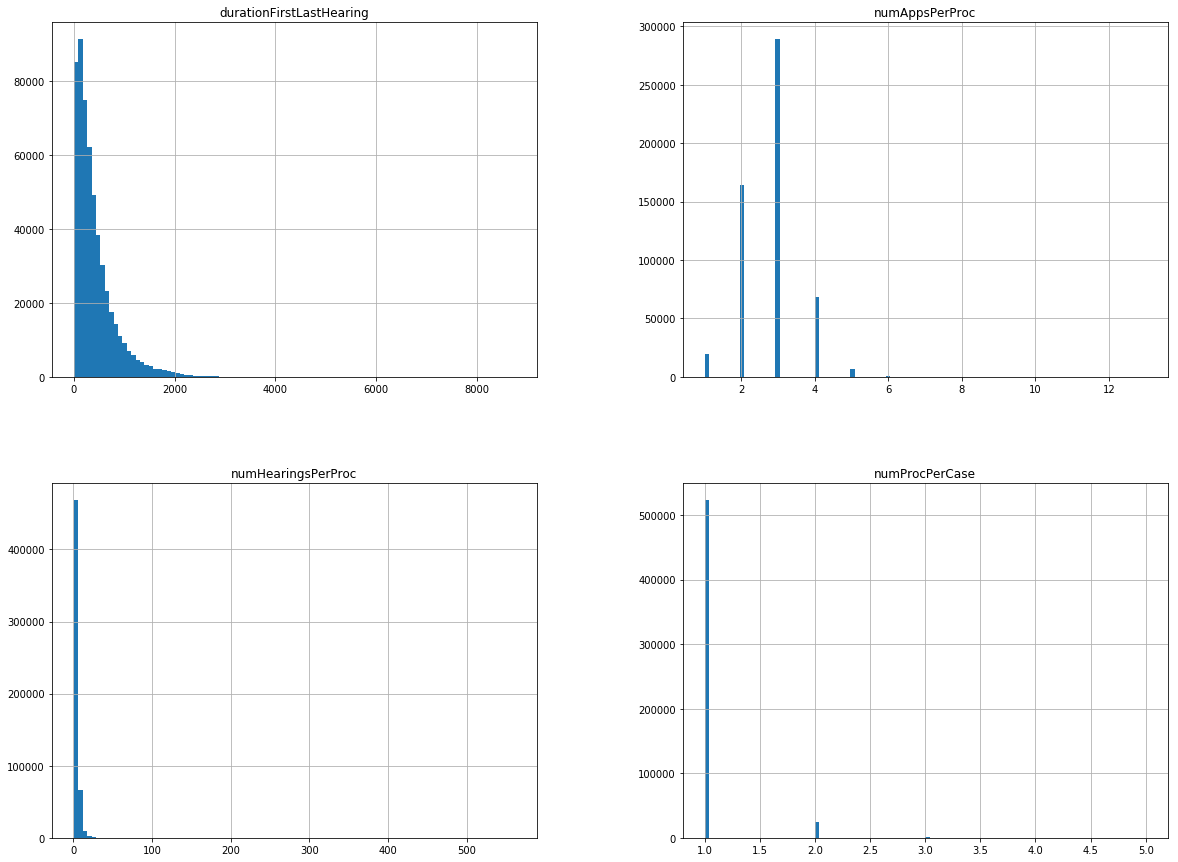

In [48]:
merged_sched_master.hist(bins=100, column=['numAppsPerProc', 'numHearingsPerProc', 'numProcPerCase', 'durationFirstLastHearing', 'averageHearingDur'], figsize=(20, 15))
plt.show()

## Average hearing duration v.s. grant rate

In [ ]:
avgHDur_grantR = merged_sched_master[merged_sched_master.averageHearingDur <= 500]

In [ ]:
avgHDur_grantR['rangeInc100'] = pd.cut(avgHDur_grantR['averageHearingDur'], np.arange(0, 500, 50))

In [ ]:
avgHDur_grantR = avgHDur_grantR.groupby(['rangeInc100', 'dec'])['dec'].count()

In [ ]:
avgHDur_grantR  = avgHDur_grantR.groupby(level=0).apply(lambda x: x / x.sum())

In [ ]:
avgHDur_grantR.unstack().reset_index().plot(x='rangeInc100', y='GRANT', kind='bar', title='Average Hearing Duation v.s. Grant Rate')

## Number of applications/proceeding v.s grant rate

In [ ]:
numApp_grantRate = merged_sched_master.groupby(['numAppsPerProc', 'dec'])['dec'].count()

In [ ]:
numApp_grantRate = numApp_grantRate.groupby(level=0).apply(lambda x: x / x.sum())
numApp_grantRate

In [ ]:
numApp_grantRate.unstack().reset_index().plot(x='numAppsPerProc', y='GRANT', kind='bar', title='Number of Applications/Proc v.s. Grant Rate')

## Number of days elapsed between first and last hearing v.s grant rate

In [ ]:
# getting rid of the rows where days elapsed is greater than 2000
durationFirstLastHearing_grantR = merged_sched_master[merged_sched_master.durationFirstLastHearing < 2000]

In [ ]:
# binning days elapsed into incremental periods of 3 months 
durationFirstLastHearing_grantR['rangeInc90'] = pd.cut(durationFirstLastHearing_grantR['durationFirstLastHearing'], np.arange(0, 2000, 90))

In [ ]:
durationFirstLastHearing_grantR = durationFirstLastHearing_grantR.groupby(['rangeInc90', 'dec'])['dec'].count()

In [ ]:
durationFirstLastHearing_grantR = durationFirstLastHearing_grantR.groupby(level=0).apply(lambda x: x / x.sum())

In [ ]:
durationFirstLastHearing_grantR

In [ ]:
durationFirstLastHearing_grantR.unstack().reset_index().plot(x='rangeInc90', y='GRANT', kind='bar', title='Number of Days Elapsed Between First and Last Hearing v.s. Grant Rate')

## Number of hearings/proceeding v.s. grant rate

In [ ]:
# getting rid of rows where there are more than 20 hearings 
numHearing_grantR = merged_sched_master[merged_sched_master.numHearingsPerProc < 20]

In [ ]:
numHearing_grantR = numHearing_grantR.groupby(['numHearingsPerProc', 'dec'])['dec'].count()

In [ ]:
numHearing_grantR = numHearing_grantR.groupby(level=0).apply(lambda x: x / x.sum())

In [ ]:
numHearing_grantR.unstack().reset_index().plot(x='numHearingsPerProc', y='GRANT', kind='bar', title='Number of Hearings/Proceeding v.s. Grant Rate')

## Political affiliation of president at the time of hearing v.s. grant rate

In [ ]:
pres_grantR = merged_sched_master.groupby(['pres_aff', 'dec'])['dec'].count()

In [ ]:
pres_grantR = pres_grantR.groupby(level=0).apply(lambda x: x / x.sum())

In [ ]:
pres_grantR

In [ ]:
pres_grantR.unstack().reset_index().plot(x='pres_aff', y='GRANT', kind='bar', title='President Affiliation At Hearing v.s. Grant Rate')